<a href="https://colab.research.google.com/github/SawairaK/XGBoost_algo/blob/main/XGBoost_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [57]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [58]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [60]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [61]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [62]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [64]:
# splitting the features
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [65]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [66]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [67]:
# Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [68]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [69]:
# Model Function
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(Y_train, train_preds)
    test_acc = accuracy_score(Y_test, test_preds)
    return train_acc, test_acc, test_preds

In [70]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
models = [
    DecisionTreeClassifier(),
    XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, gamma=0.001, random_state=42)
]

model_names = [model.__class__.__name__ for model in models]

for i, model in enumerate(models):
    train_acc, test_acc, _ = evaluate_model(model, X_train, Y_train, X_test, Y_test)
    print(f"Model: {model_names[i]}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print("-" * 40)

Model: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8852
----------------------------------------
Model: XGBClassifier
Training Accuracy: 0.9835
Testing Accuracy: 0.8852
----------------------------------------


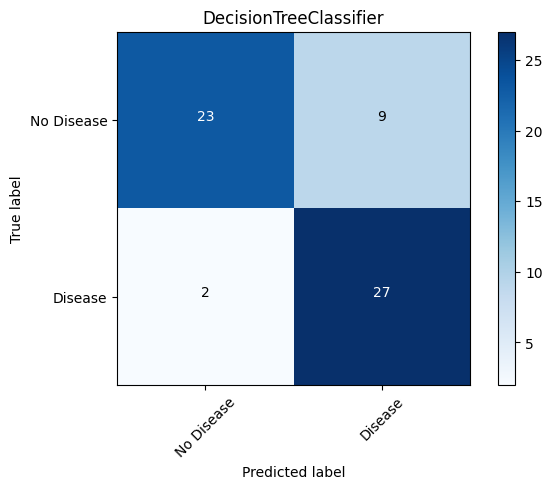

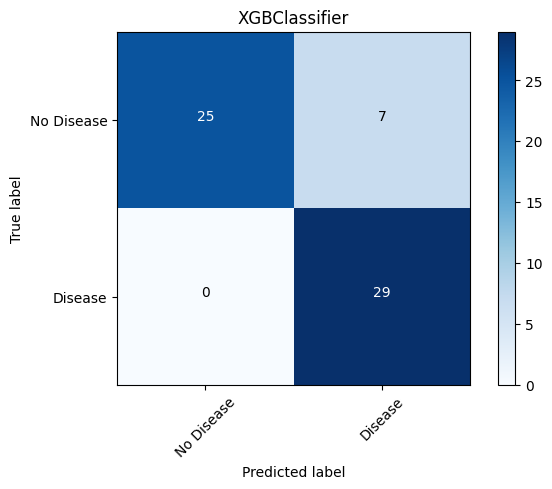

In [72]:
train_results = []
test_results = []
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, Y_train, X_test, Y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(Y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
    plt.show()

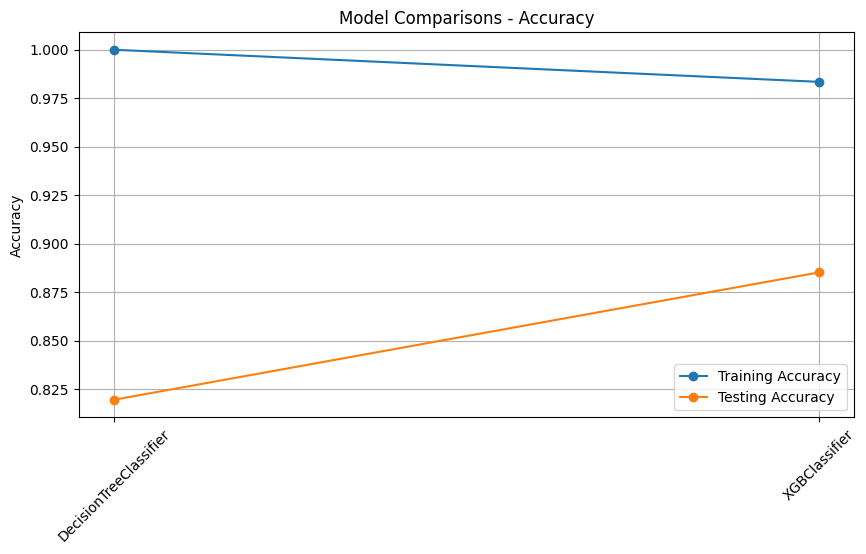

In [73]:
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(True)  # Optional grid for clarity
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()


In [74]:
# XGBClassifier
gb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, booster='gbtree', gamma=0.001, random_state=0)
param_grid = dict({'n_estimators': [ 10,50, 100, 200, 300],'max_depth': [2, 3,4],'learning_rate' : [0.01, 0.1, 0.15]})

# define grid search object
gridXGB = GridSearchCV(gb, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, refit = False)

In [75]:
#find the optimal hyperparameters
gridXGB.fit(X_train, Y_train)
# display the optimal parameters
gridXGB.best_params_

{'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 50}

In [76]:
# construct the best XGBClassifier using the optimal parameters
gb = XGBClassifier(max_depth=2, learning_rate=0.15, n_estimators=50,booster='gbtree', gamma=0.001, random_state=42)

In [77]:
#fit the training data
gb.fit(X_train, Y_train)
#predict on test data
gb_pred_test = gb.predict(X_test)
gb_probs_test = gb.predict_proba(X_test)

# Evaluate the model's performance
accuracy = gb.score(X_test, Y_test)
print(f'Accuracy of the XG model with best parameters: {accuracy:.2f}')

Accuracy of the XG model with best parameters: 0.89


In [78]:
# Function for hyperparameter tuning and model evaluation
def tune_and_evaluate_model(model, param_grid, X_train, Y_train, X_test, Y_test, scoring='roc_auc'):
    # Define grid search object
    grid = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1, refit=False)

    # Fit the grid search
    grid.fit(X_train, Y_train)

    # Get the best parameters
    best_params = grid.best_params_

    # model using the best parameters
    best_model = model.__class__(**best_params)

    # Fit the best model on the training data
    best_model.fit(X_train, Y_train)

    # Predict on the test data
    test_preds = best_model.predict(X_test)
    test_probs = best_model.predict_proba(X_test)

    # Evaluate the model's accuracy
    accuracy = best_model.score(X_test, Y_test)

    print(f'Best parameters for {model.__class__.__name__}: {best_params}')
    print(f'Accuracy of the {model.__class__.__name__} model with best parameters: {accuracy:.2f}')

    return best_model, best_params, accuracy, test_preds, test_probs

# XGBoost
xgb_model = XGBClassifier(booster='gbtree', gamma=0.001, random_state=0)
xgb_param_grid = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth': [2, 3, 4], 'learning_rate': [0.01, 0.1, 0.15]}

#  Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

#  evaluating XGBoost on best params
best_xgb_model, best_xgb_params, xgb_accuracy, xgb_preds, xgb_probs = tune_and_evaluate_model(
    xgb_model, xgb_param_grid, X_train, Y_train, X_test, Y_test)

# evaluating Decision Tree
best_dt_model, best_dt_params, dt_accuracy, dt_preds, dt_probs = tune_and_evaluate_model(
    dt_model, dt_param_grid, X_train, Y_train, X_test, Y_test)


Best parameters for XGBClassifier: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 50}
Accuracy of the XGBClassifier model with best parameters: 0.89
Best parameters for DecisionTreeClassifier: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy of the DecisionTreeClassifier model with best parameters: 0.77
